카테고리분포

In [3]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

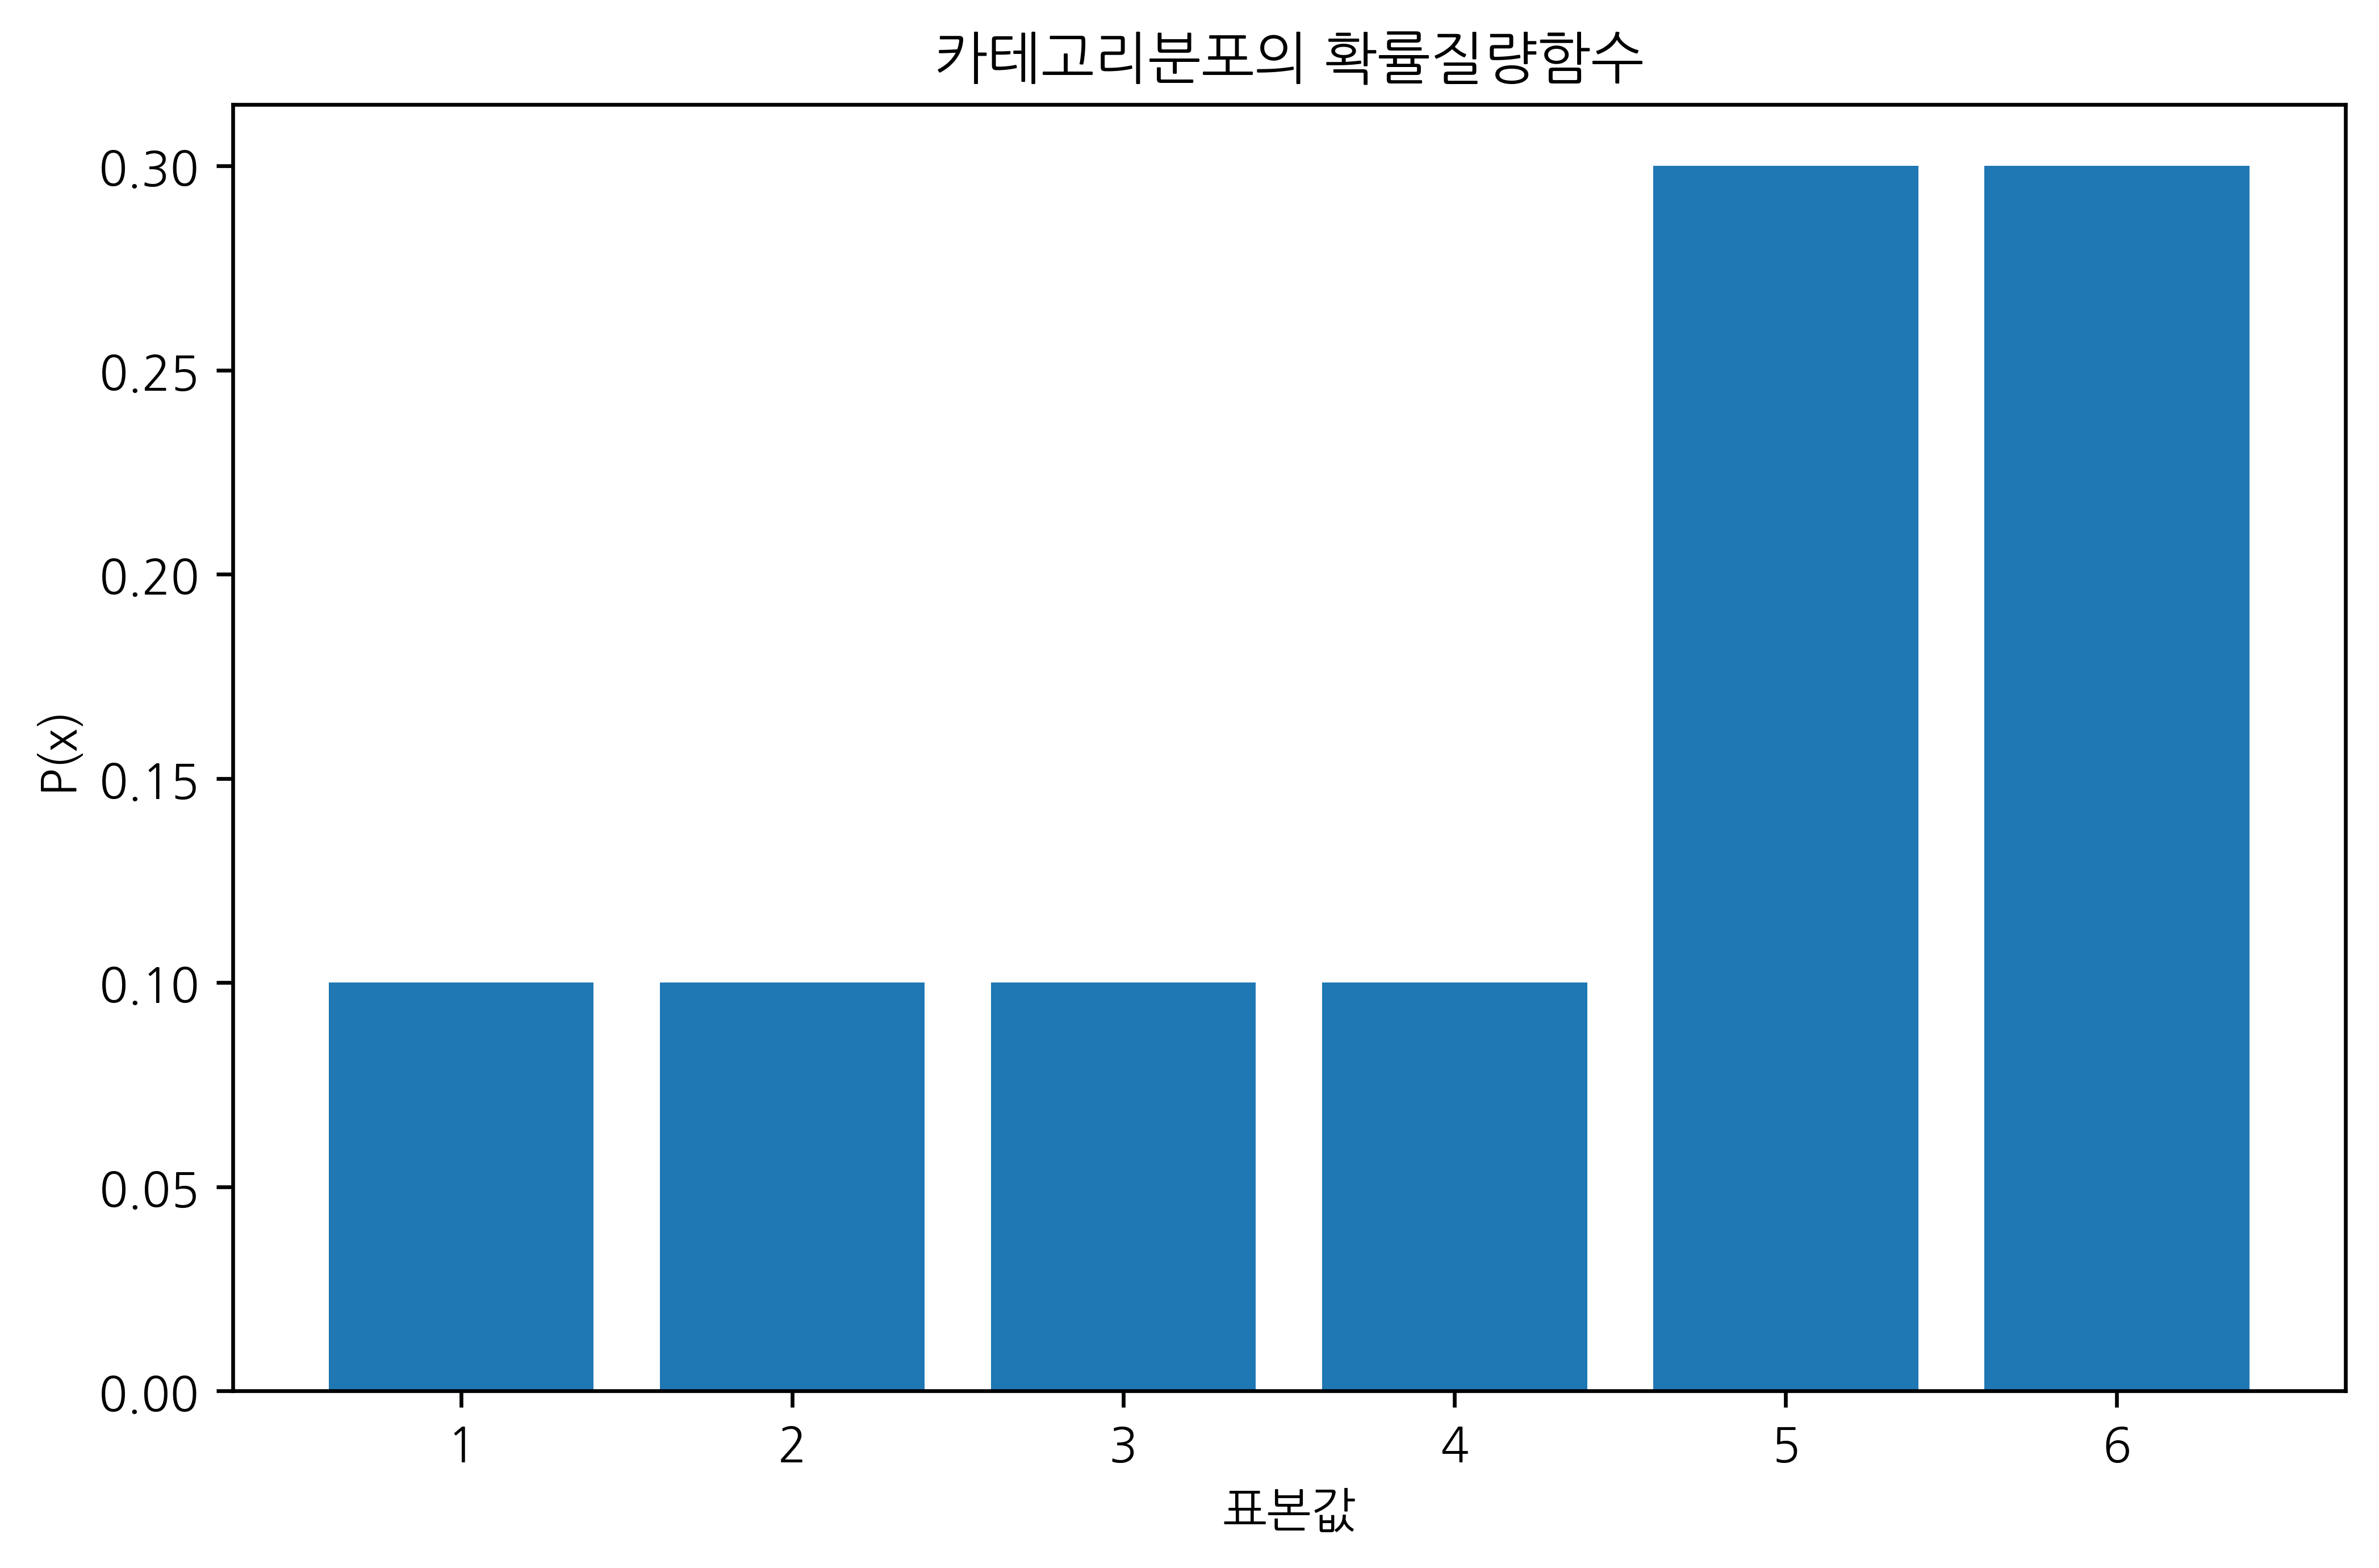

In [6]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel("표본값")
plt.title("카테고리분포의 확률질량함수")
plt.show()

In [7]:
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

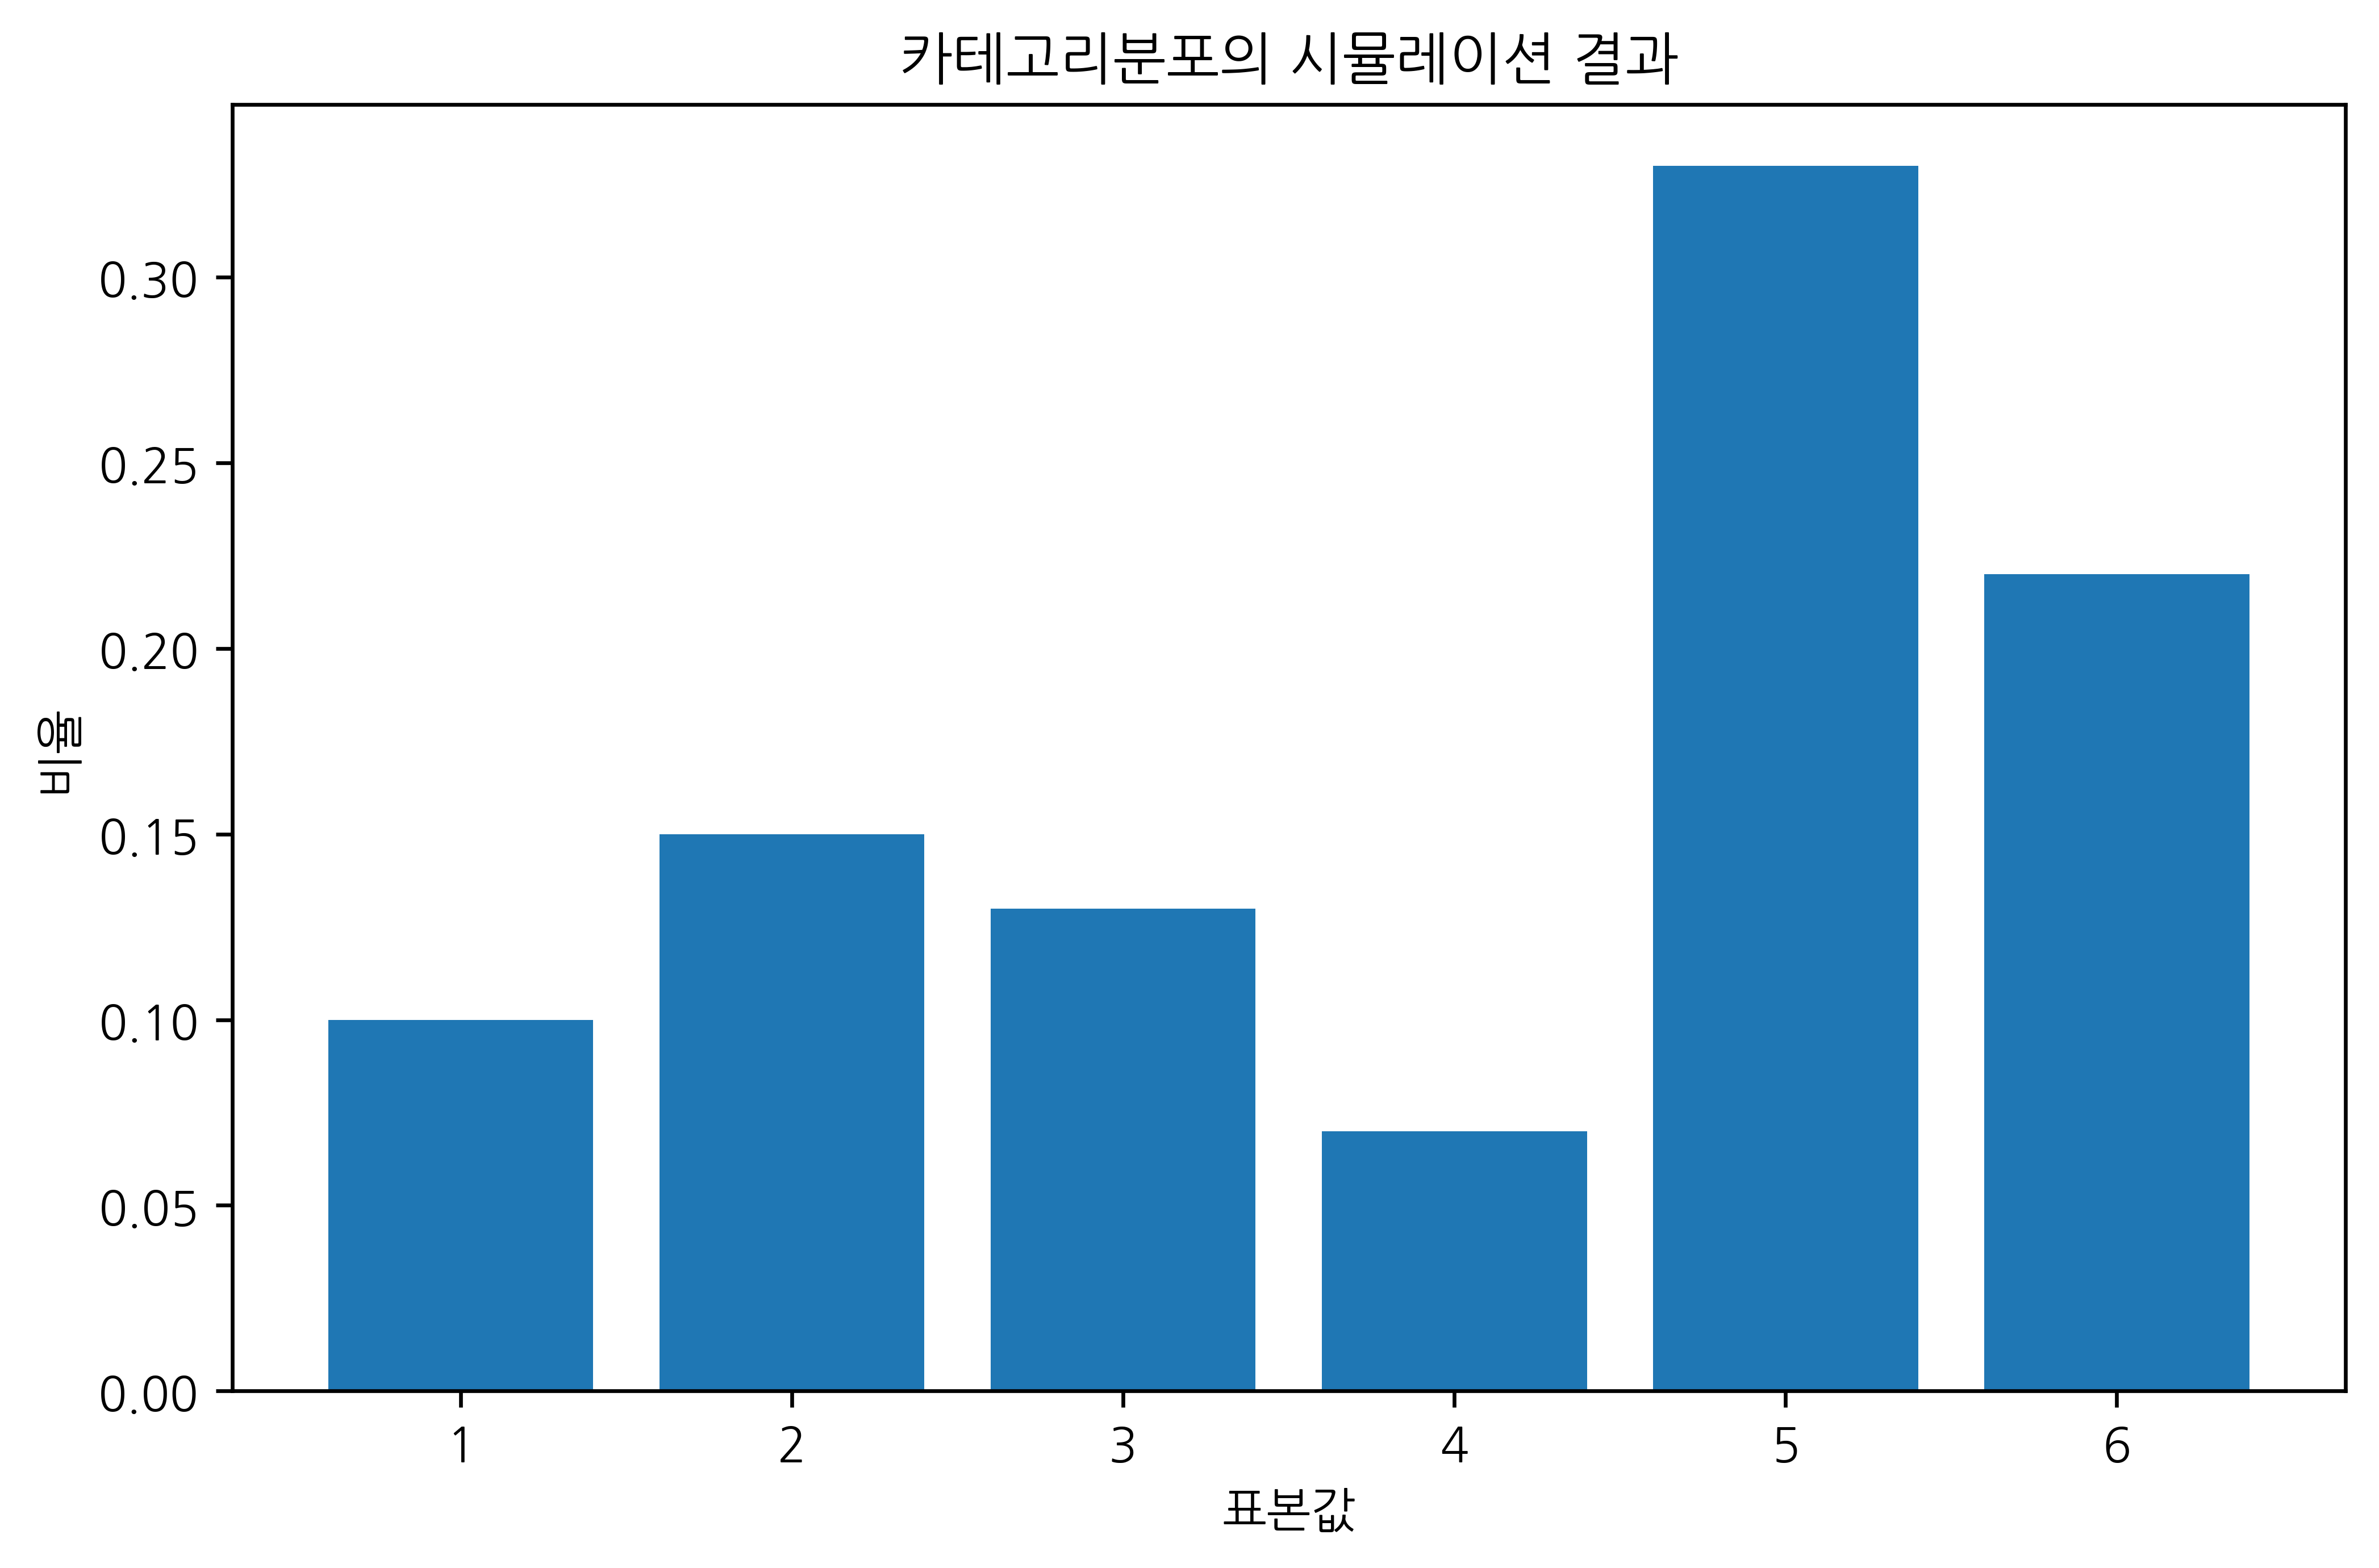

In [8]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.ylabel("비율")
plt.show()

In [17]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                  index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,이론,0.10
1,1,시뮬레이션,0.10
2,2,이론,0.10
3,2,시뮬레이션,0.15
4,3,이론,0.10
5,3,시뮬레이션,0.13
6,4,이론,0.10
7,4,시뮬레이션,0.07
8,5,이론,0.30
9,5,시뮬레이션,0.33


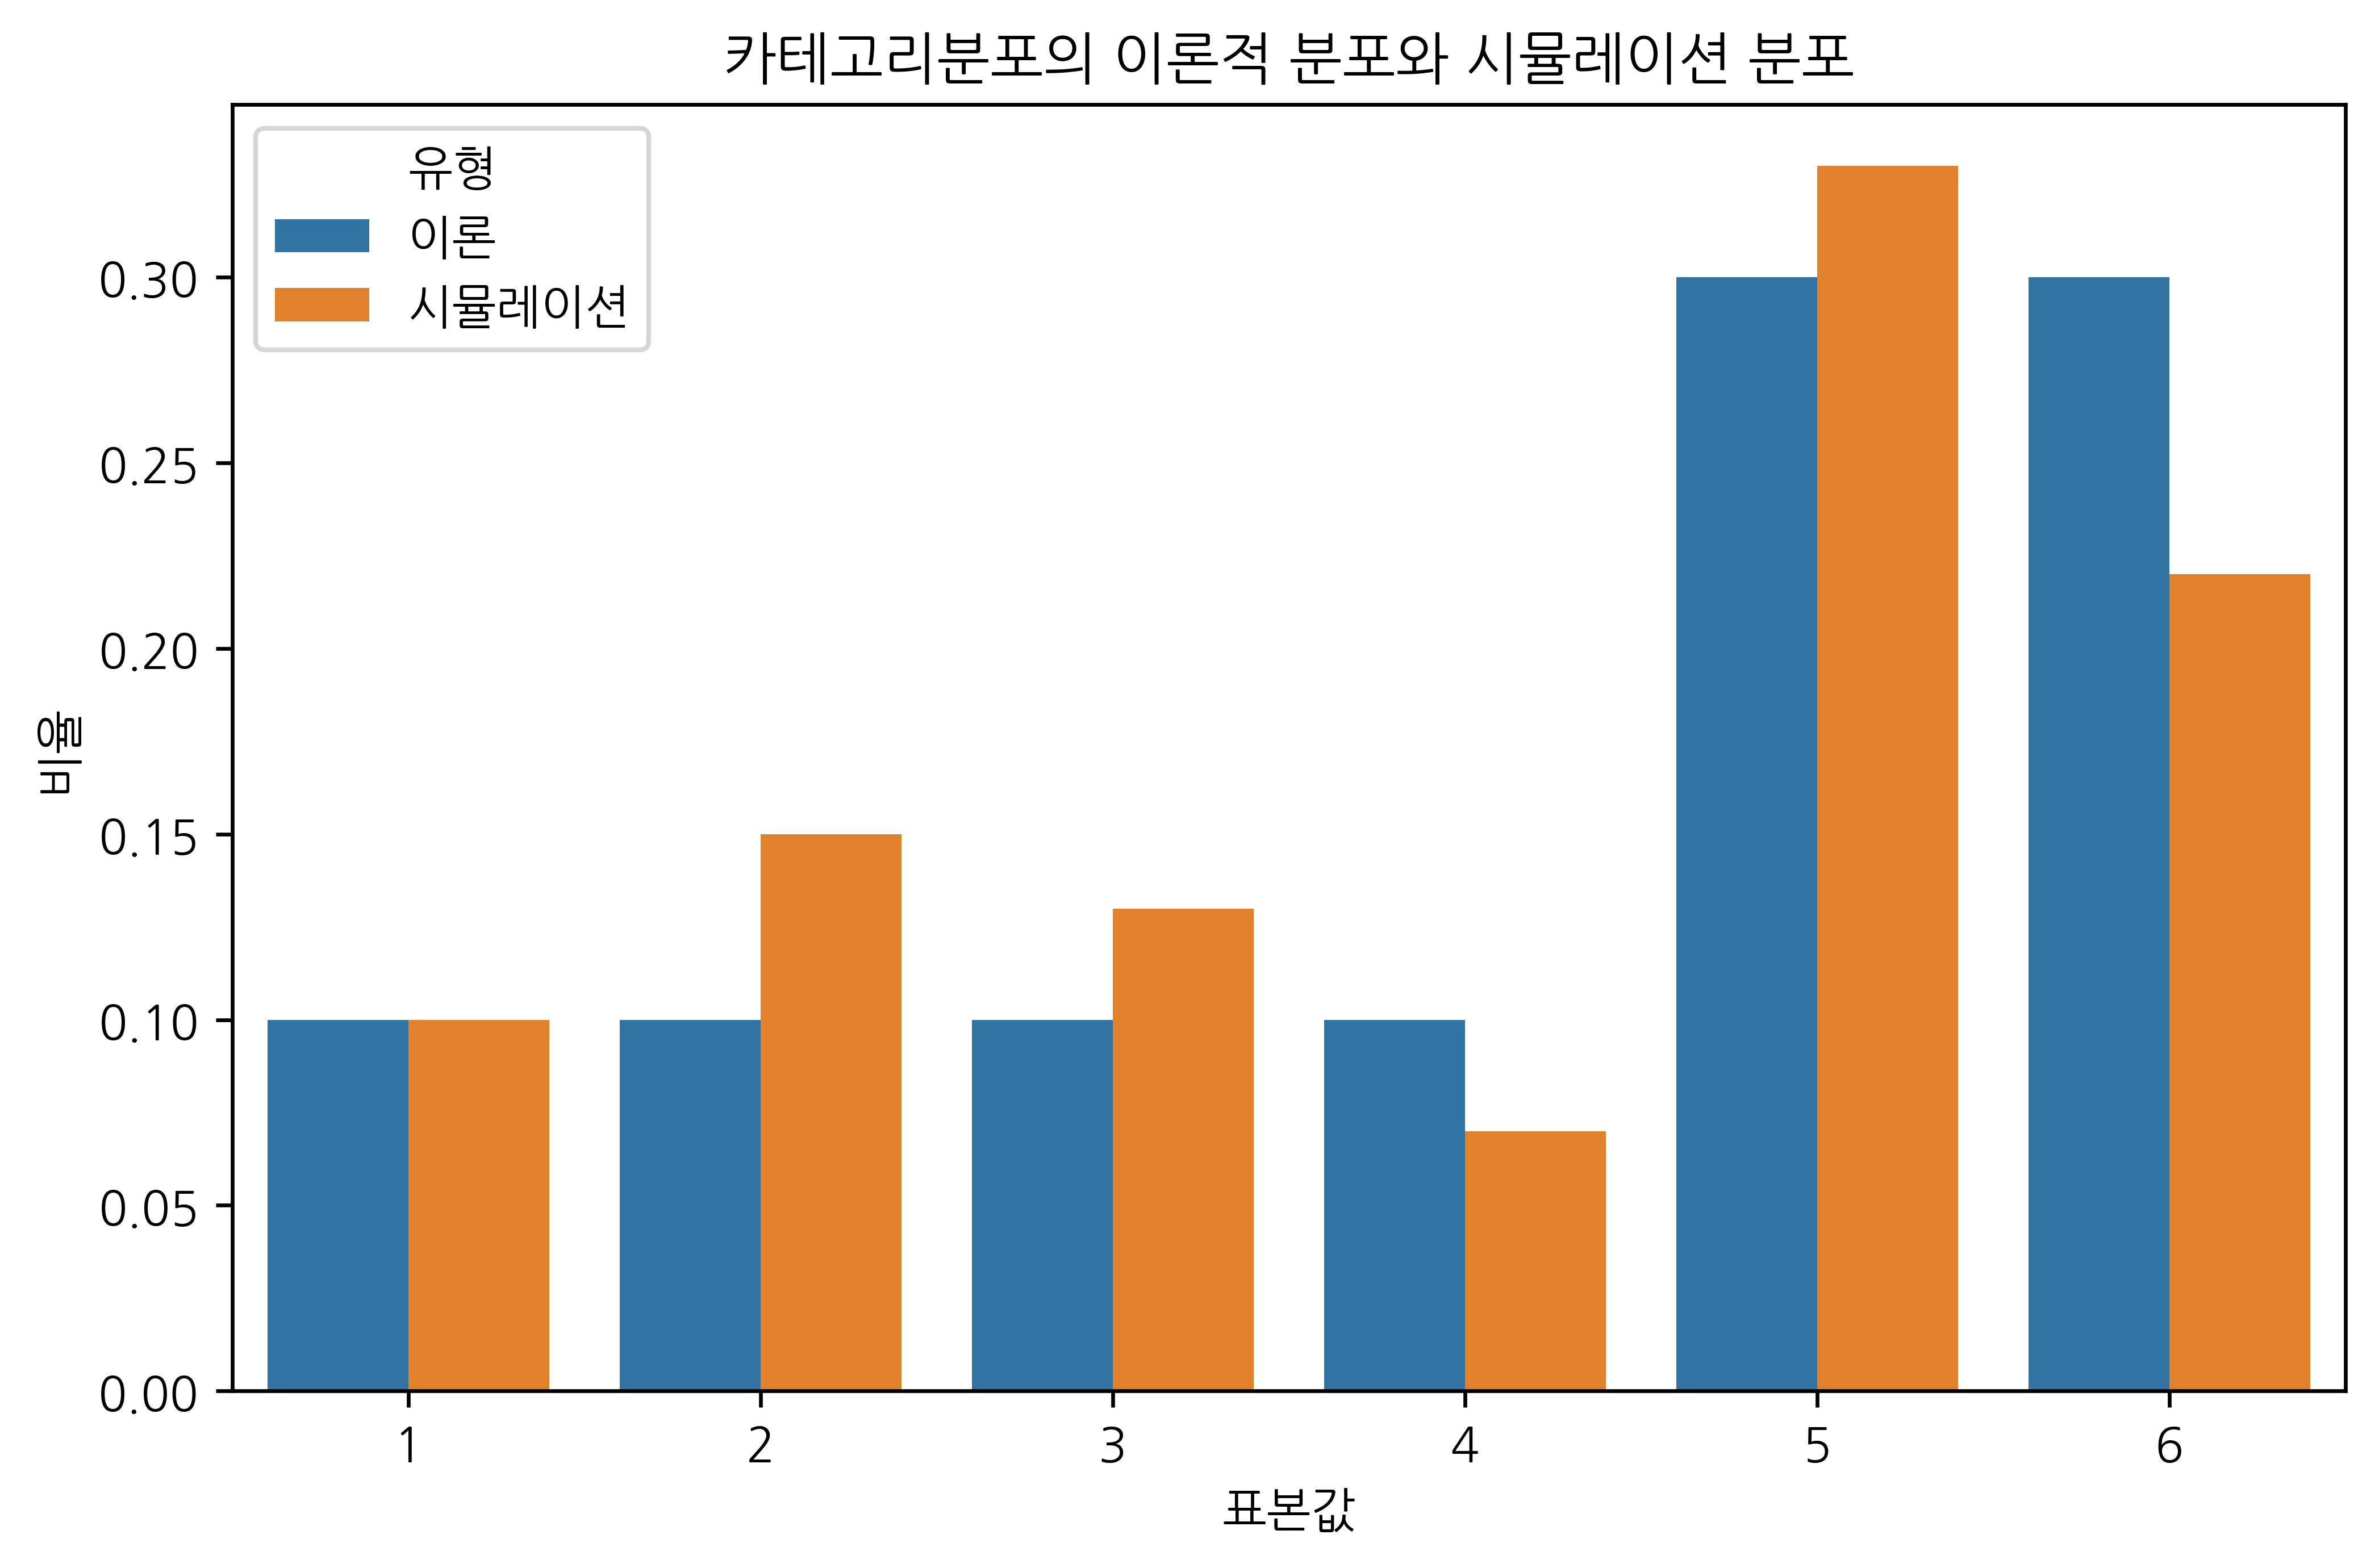

In [18]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("카테고리분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

연습문제 8.3.2

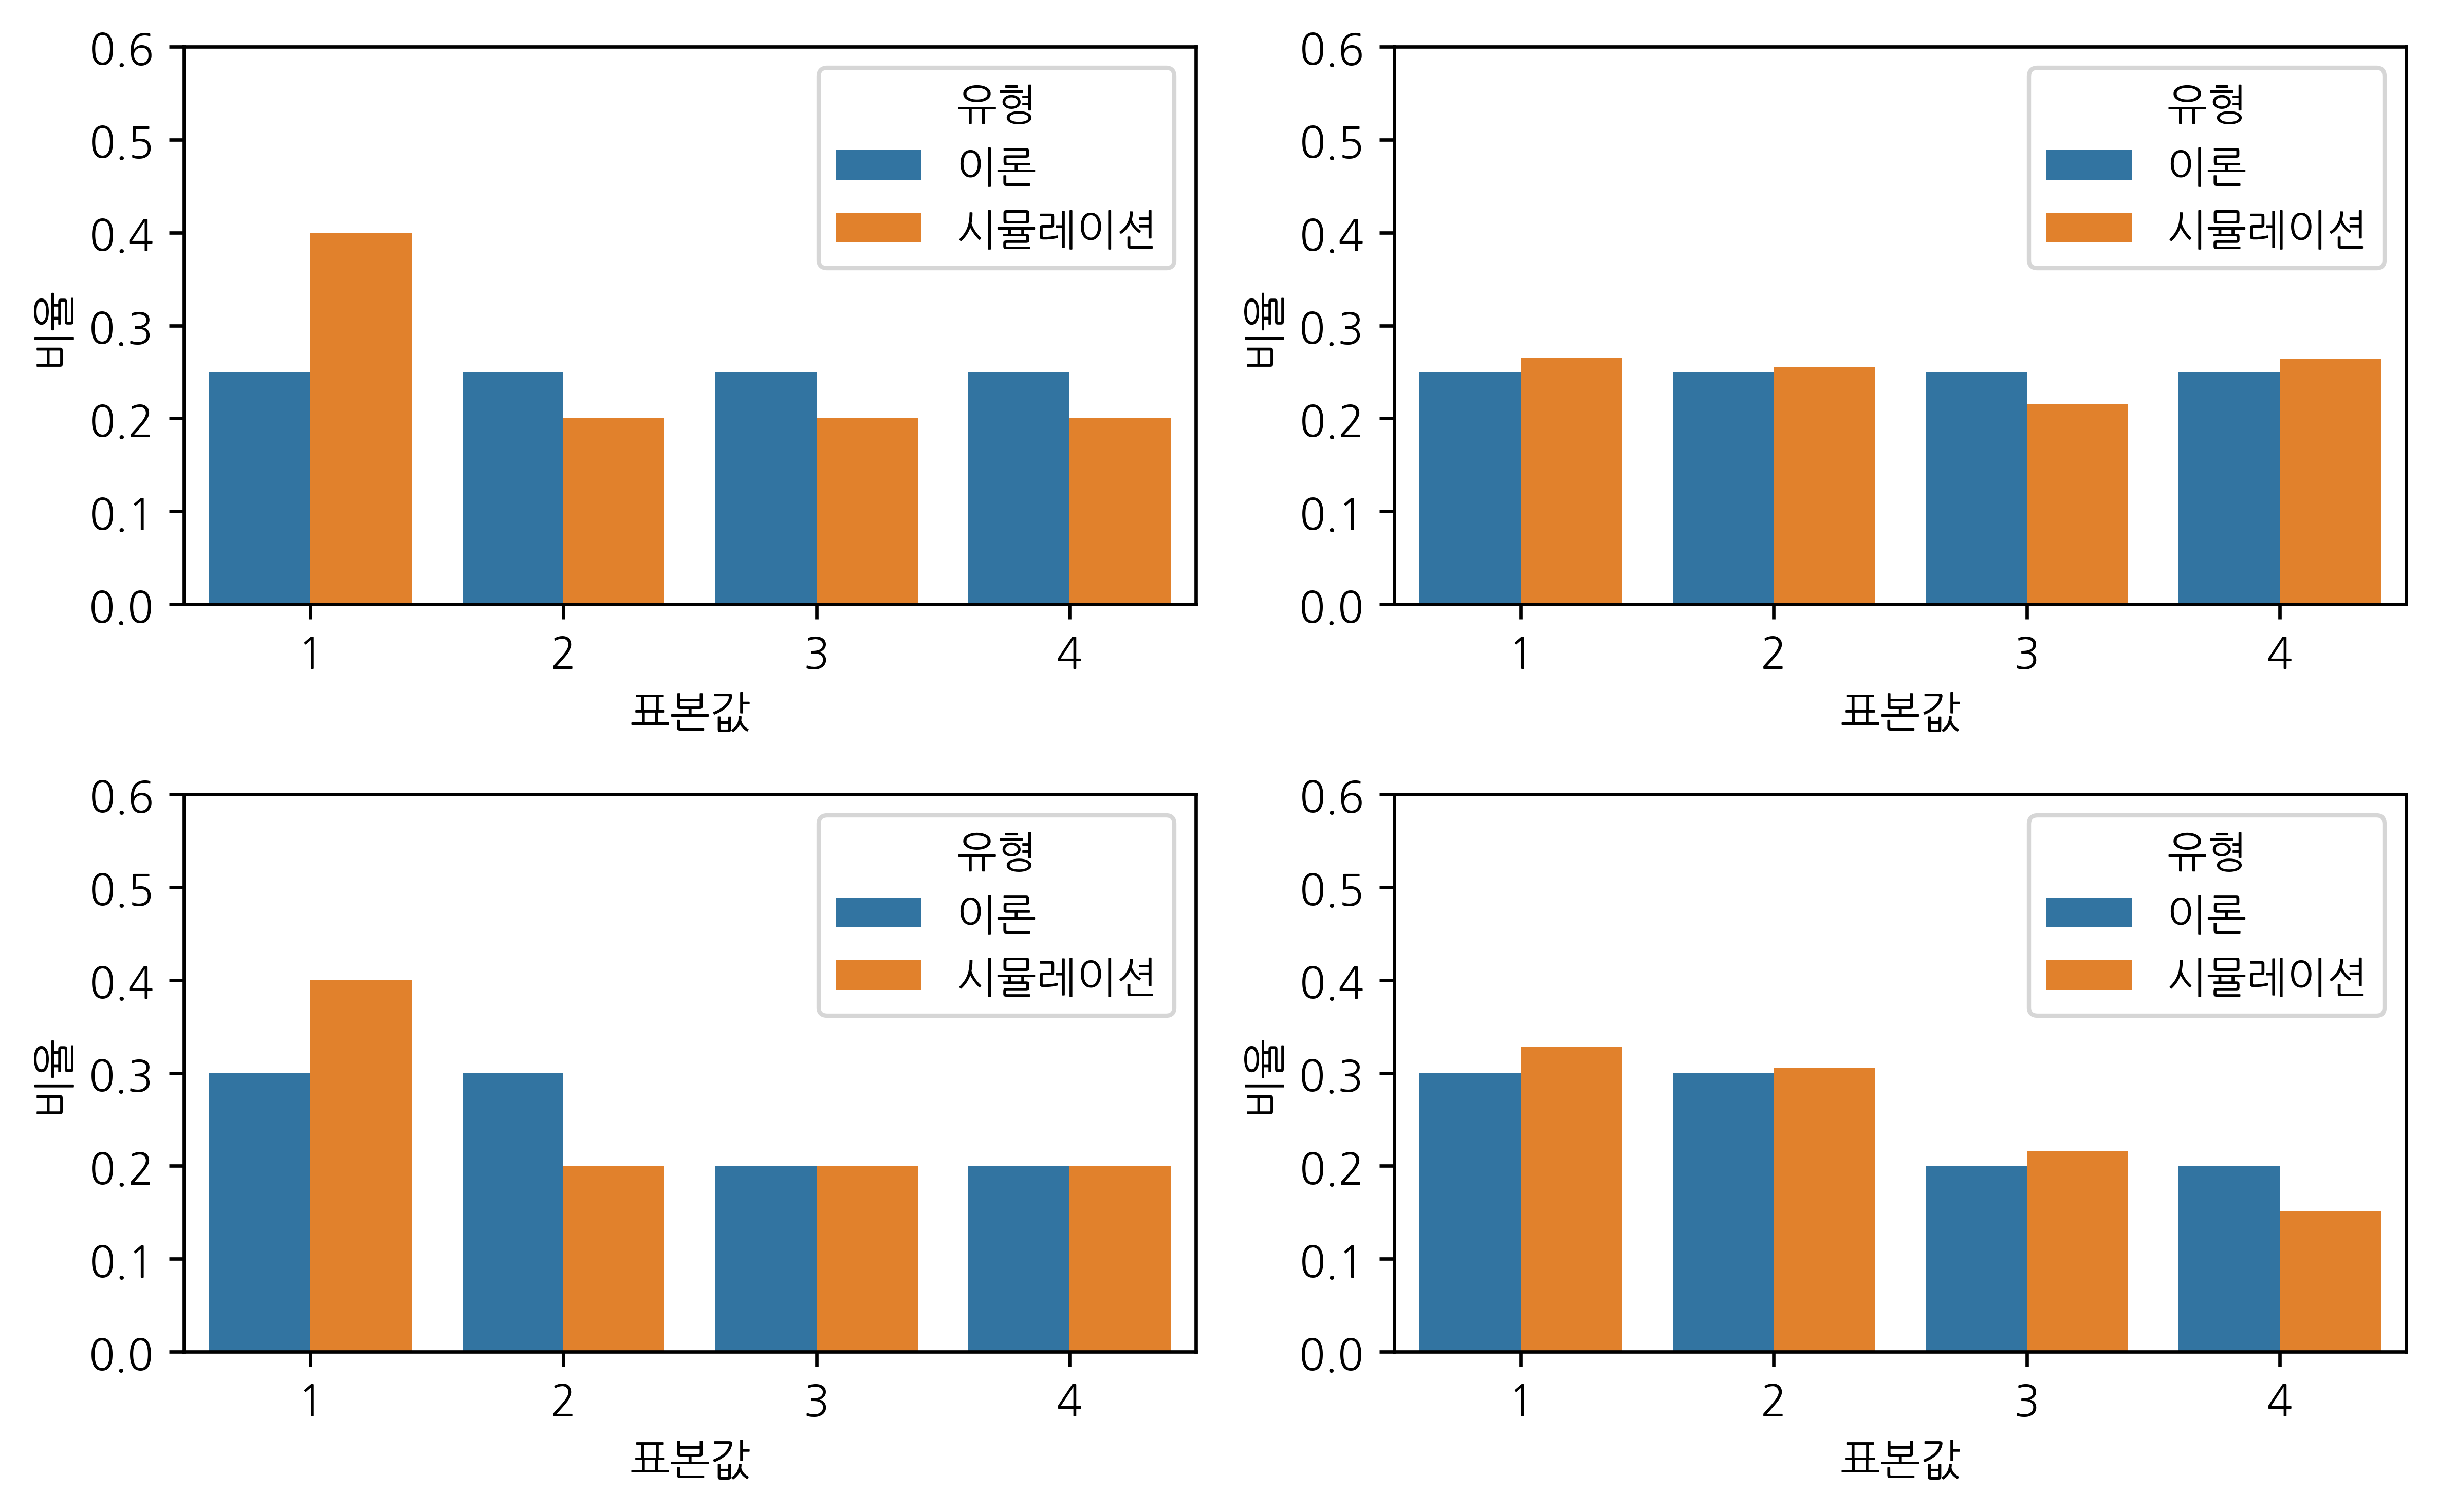

In [23]:
def plot_categorical(mu, N):
    rv = sp.stats.multinomial(1, mu)
    xx = np.arange(1, len(mu) + 1)
    xx_ohe = pd.get_dummies(xx)
    X = rv.rvs(N, random_state=0)
    y = X.sum(axis=0) / float(len(X))
    df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                     index=xx).stack()
    df = df.reset_index()
    df.columns = ["표본값", "유형", "비율"]
    df.pivot("표본값", "유형", "비율")
    sns.barplot(x="표본값", y="비율", hue="유형", data=df)
    plt.ylim(0, 0.6)
    
mu1 = [0.25, 0.25, 0.25, 0.25]
N1 = 10
mu2 = [0.3, 0.3, 0.2, 0.2]
N2 = 1000

plt.subplot(221)
plot_categorical(mu1, N1)
plt.subplot(222)
plot_categorical(mu1, N2)
plt.subplot(223)
plot_categorical(mu2, N1)
plt.subplot(224)
plot_categorical(mu2, N2)
plt.tight_layout()
plt.show()

연습문제 8.5.1

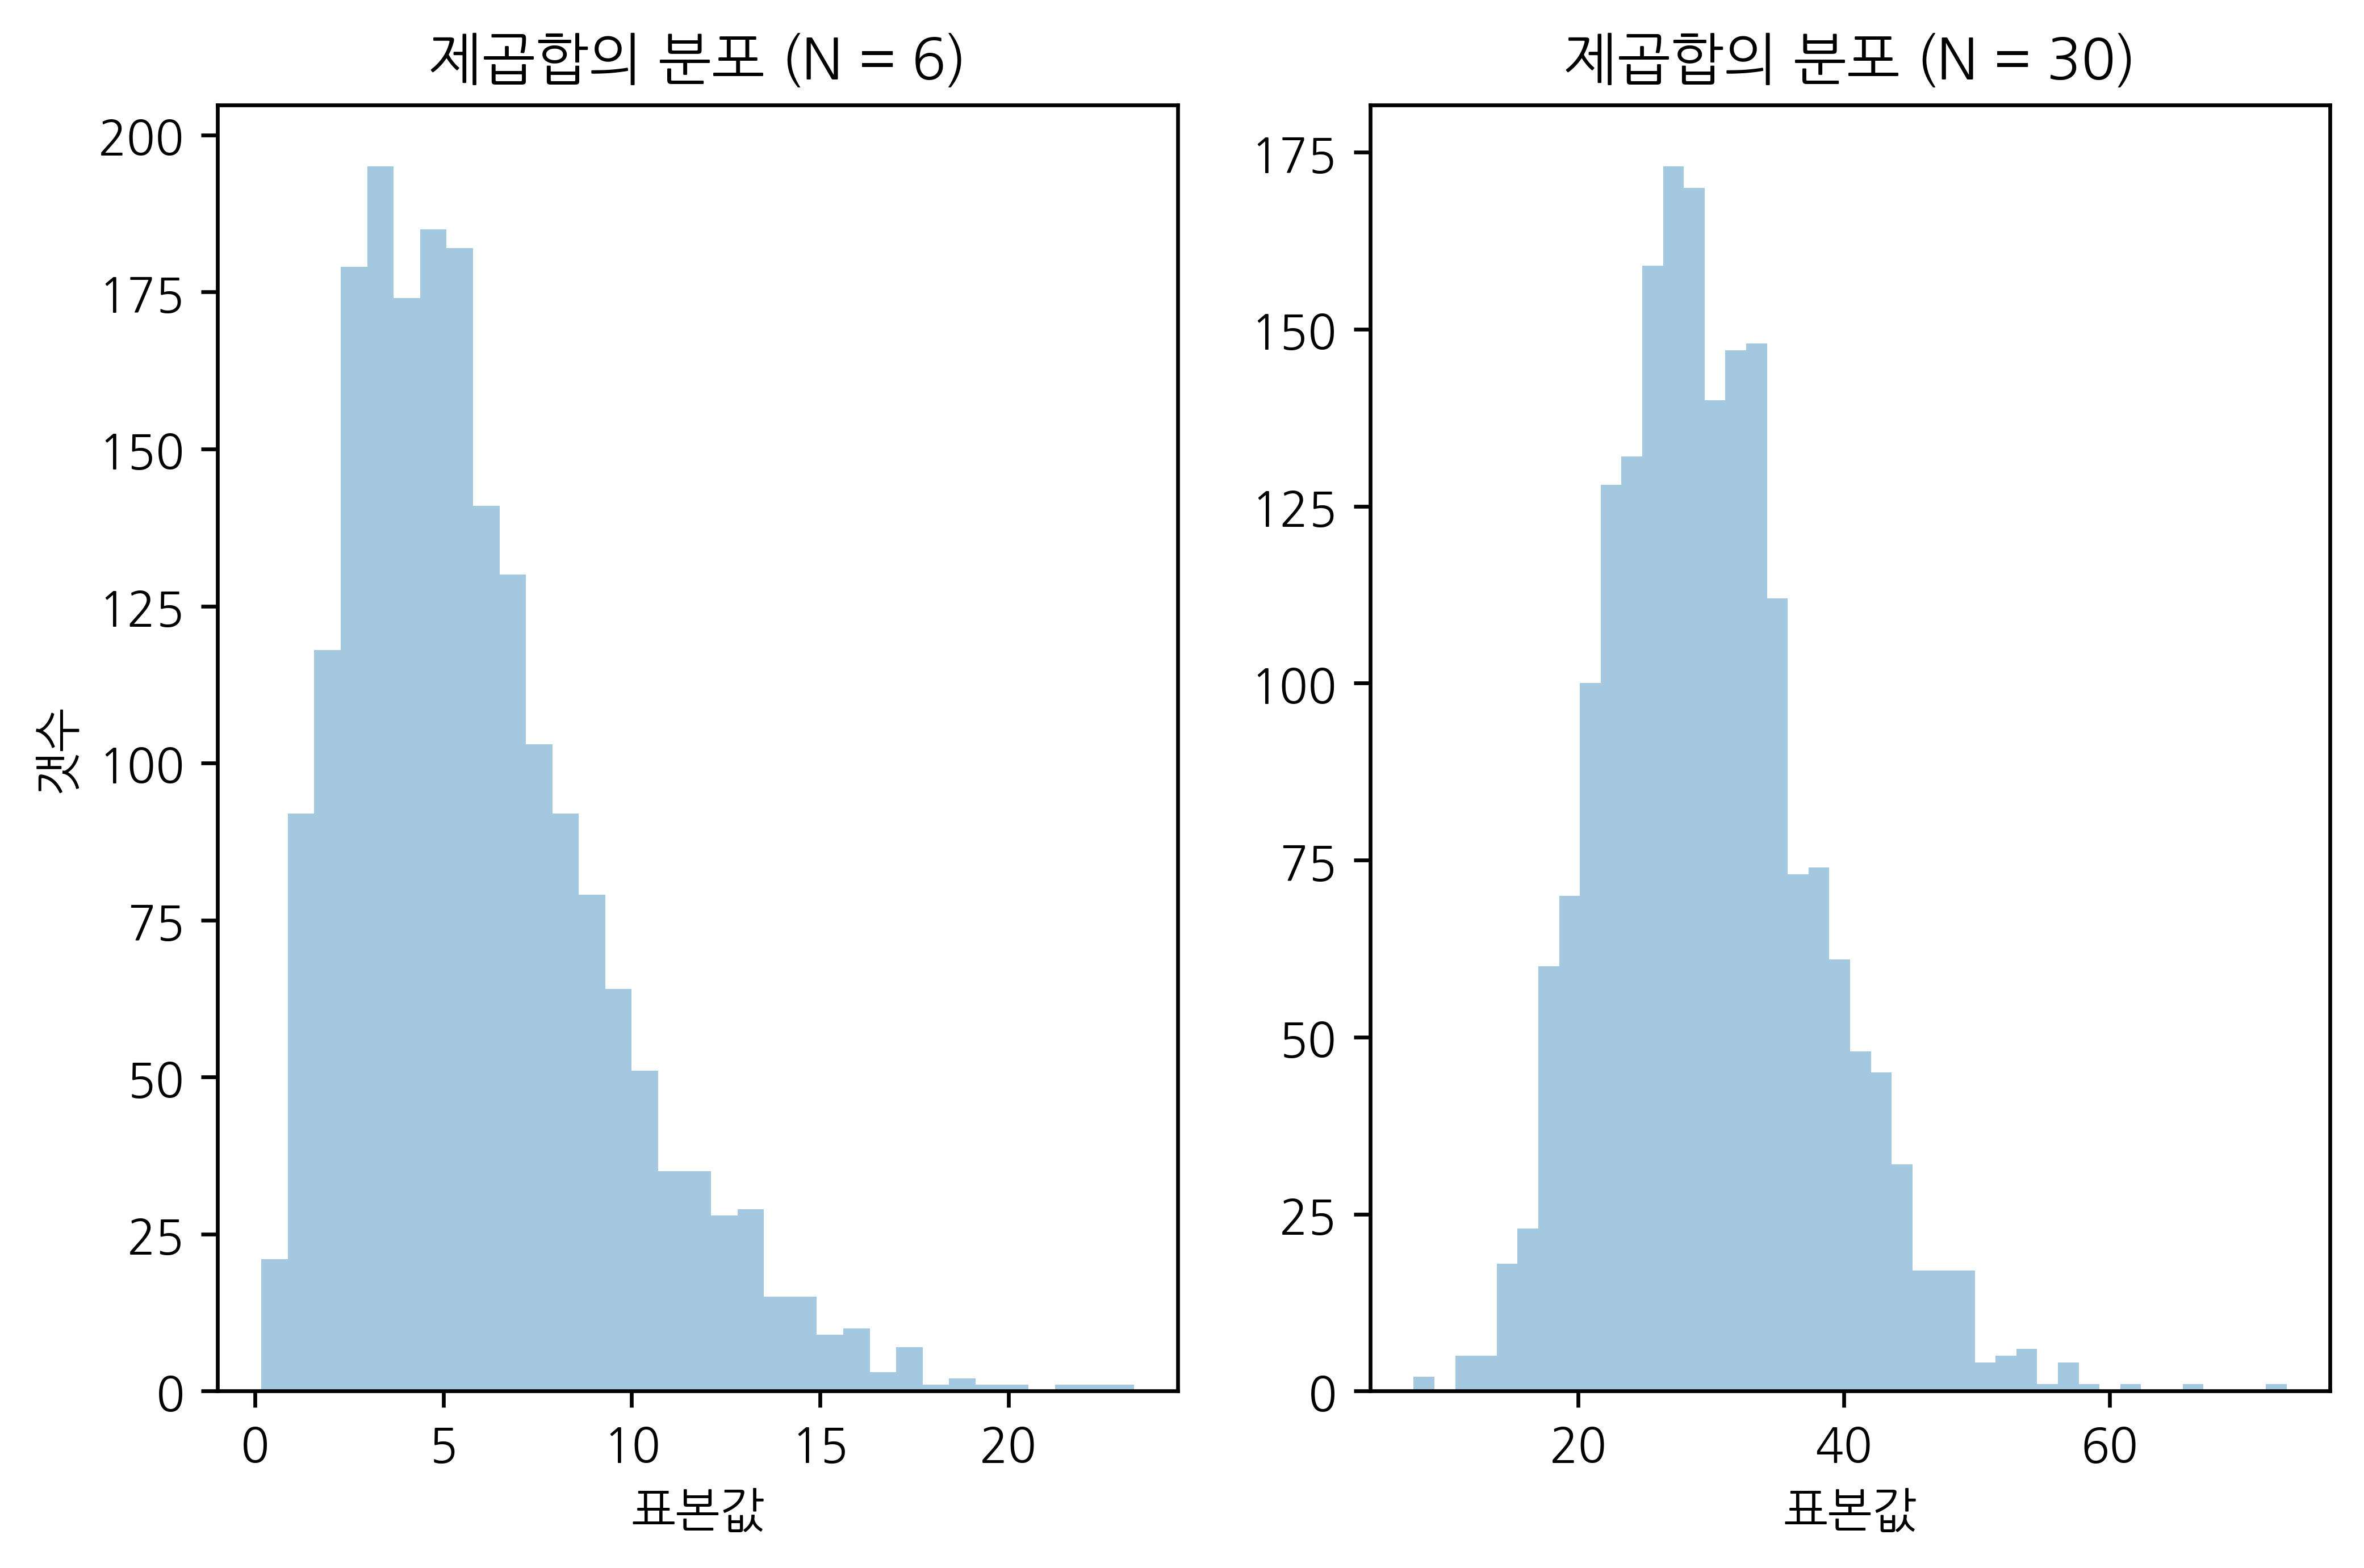

In [30]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 2, 1)
N = 6
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.title("제곱합의 분포 (N = 6)")
plt.xlabel("표본값")
plt.ylabel("갯수")

plt.subplot(1, 2, 2)
N = 30
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.title("제곱합의 분포 (N = 30)")
plt.xlabel("표본값")

plt.show()